In [9]:
import numpy as np

def mv(data, N=500):
    data_len = len(data)
    kernel = np.ones(N)
    stop_point = data_len - N + 1
    result = []
    for i in range(stop_point):
        result.append((data[i:i+N] @ kernel) / N)
    return result

exp = np.random.randint(low=0, high=100, size=(77700))
print(exp[:20])
results = mv(exp, N=500)
print(results[:10], len(results), 77700 - 500 +1)

[58 25  8  8 47 68 77 20 23 82 89  4 67 16 49 58 59  6  0 45]
[np.float64(52.042), np.float64(51.962), np.float64(52.02), np.float64(52.096), np.float64(52.268), np.float64(52.222), np.float64(52.282), np.float64(52.232), np.float64(52.288), np.float64(52.396)] 77201 77201


# 좌표계 변환
- transation = 평행 이동
    - O_i 상의 임의의 점을 O_j 상의 좌표계로 변환하고 싶다면, 두 좌표계의 원점 좌표의 차이만큼 더하거나 빼주면 된다
- rotation = 회전 이동
    - 2차원 평면에서 어떤 점(또는 벡터)을 반시계 방향으로 임의의 각도 theta만큼 회전시키는 변환 행렬은 다음과 같다
    - 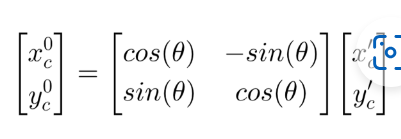
    - 시계 방향으로의 회전은 좌측 하단의 사인값에 -를 붙이면 된다
    - 회전된 점(또는 벡터)를 기준으로 하는 2차원 좌표계가 있다고 가정하면, 점(또는 벡터)의 회전은 그것이 속한 2차원 좌표계를 회전시킨 것이라고도 볼 수 있다
    - 좌표계 i 상의 점을 좌표계 j 상의 점으로 변환해주는 행렬을 R upper i under j라고 표기한다
    - <img src="https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://cdn.filestackcontent.com/4Oa7rLCuQHmvFqoY5Pyq" width="150" height="200"/>
    - 회전 행렬의 중요 성질
      - <img src="https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://cdn.filestackcontent.com/7lbMB4tsTOiBiaOxQX8D" width="250" height="200"/>
- 회전 + 이동 ==> **homogeneous matrix**
  - O_i 좌표계 상의 임의의 점을 O_j 좌표계 상의 임의의 좌표로 변환하기 위해서는 두 좌표계 사이의 회전과 이동을 적용해야 한다
    - <img src="https://cdn.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/https://cdn.filestackcontent.com/hExogZF9SmyzWUI03uxn" width="600" height="850"/>
    - 위의 공식이 의미하는 바는 두 좌표계의 각도가 틀어져있는 경우, 우선 그 각도차를 해소한 후(두 좌표계의 사잇각을 0도로 만들어준다;회전) 두 좌표계의 원점 좌표 간 차이를 적용하여 이동시켜주어야 한다는 것을 의미한다
    - 하지만 이 공식에 나와있듯이 회전과 이동은 별개의 연산이기 때문에 별도로 계산해주어야 한다는 단점이 있어, 로봇 공학자들은 이를 해결하기 위해 **homogeneous matrix**라는 개념을 도입하였다
    - **homogeneous matrix**는 2 X 2 행렬을 3 X 3 행렬로 확장하여 회전과 이동을 모두 나타낸 행렬이다(단, 계산 결과인 3 X 1 벡터에서 첫 두개의 원소만 의미를 갖고 나머지 원소는 항상 1의 값을 갖는다)
      

In [ ]:
코드 구현 부터
https://roadbalance_edu.teachable.com/courses/5cee42/lectures/48650227